# Evaluation

## Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data Set 

In [2]:
X_test = np.load("../data/cibs-ddsm/processed/X_test.npy")
y_test = np.load("../data/cibs-ddsm/processed/y_test.npy")

## Load Final Trained Model

In [3]:
# --- Load the trained model ---
model_path = "../results/model_weights/final_model.h5"
model = tf.keras.models.load_model(model_path)

## Run Predictions

In [4]:
# --- Predict on test data ---
y_probs = model.predict(X_test).flatten()
y_preds = (y_probs >= 0.3).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


## Evaluate with Classification Metrics

In [5]:
# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)  # Sensitivity
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_probs)

In [6]:
# Specificity = TN / (TN + FP)
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

In [7]:
# --- Print metrics ---
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Sensitivity   : {recall:.4f}")
print(f"Specificity   : {specificity:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"AUC           : {auc:.4f}")

Accuracy      : 0.4412
Precision     : 0.4039
Sensitivity   : 0.7705
Specificity   : 0.2133
F1 Score      : 0.5300
AUC           : 0.5046


## Confusion Matrix

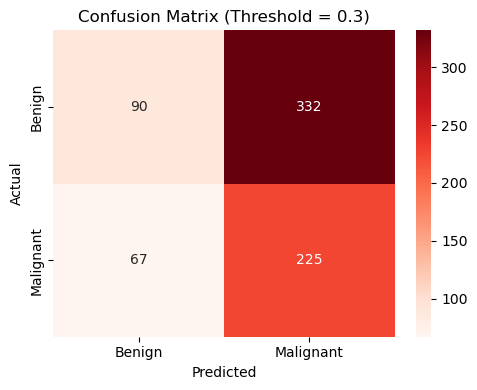

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.3)")
plt.tight_layout()
plt.show()

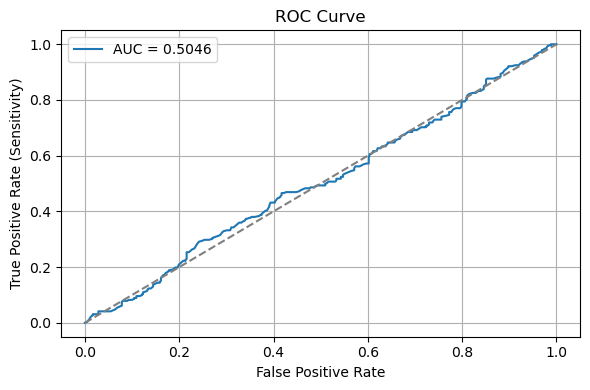

In [9]:
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()